## Data Preparation and Preprocessing

### Contoh Kasus Indonesian Twitter Emotion Dataset

Dataset ini berisi 4.403 Indonesian tweets dengan 5 emotion classes: love, anger, sadness, joy and fear.

link dataset : https://github.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset

### install dan import dependency

In [17]:
# Data handling, manipulation, and numerical computations
import pandas as pd
import numpy as np

# Text preprocessing, cleaning, and manipulation.
import re
import nltk
import emoji

# Handling and manipulating JSON data
import json

# Text preprocessing for Indonesian language, specifically stop word removal
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Handling imbalanced datasets, specifically in classification tasks
from imblearn.over_sampling import BorderlineSMOTE

# Text feature extraction for machine learning models
from sklearn.feature_extraction.text import TfidfVectorizer

# Data visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from collections import Counter

### Load dataset

In [5]:
import pandas as pd

dataset = pd.read_csv('..\dataset\Twitter_Emotion_Dataset.csv')
dataset.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


### Fungsi Untuk Text preprocessing

In [15]:
# Data cleaning
def clean_text(text):
    emoticon_byte_regex = r"\s*(?:\\x[A-Fa-f0-9]{2})+"
    url_regex = r"((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+)||(http\S+))"

    text = re.sub(emoticon_byte_regex, "", text)  # remove emoticon bytes
    text = re.sub(url_regex, "", text)  # remove every url
    text = re.sub(r"<[^>]*>", "", text)  # remove html tags
    text = re.sub(r"@[A-Za-z0-9]+", "", text)  # remove twitter usernames
    text = re.sub(r"\n", " ", text)  # remove every new line '\n'
    text = re.sub("@[\w\-]+", "", text)  # remove mentions
    text = re.sub("RT", "", text)  # remove every retweet symbol
    text = re.sub("USER", "", text)  # remove every user
    text = re.sub(" URL", " ", text)  # remove word URL
    text = re.sub(" url", " ", text)  # remove word url
    text = re.sub("\+", " ", text)  # remove backslash
    text = re.sub("\s+", " ", text)  # remove special regular expression character
    text = re.sub("[^0-9a-zA-Z]", " ", text)  # remove punctuation
    text = re.sub("[^a-zA-Z]", " ", text)  # remove numbers
    text = re.sub(" +", " ", text)  # remove extra spaces
    # Remove URLs or links
    text = re.sub(r'http\S+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#\w+', '', text)
    # Remove usernames and mentions (@)
    text = re.sub(r'@\w+', '', text)
    # Remove retweets (RT)
    text = re.sub(r'RT', '', text)
    # Remove punctuation, new lines, numbers, blank spaces, and emojis
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Remove emojis (you can add more emoji patterns)
    text = emoji.demojize(text)
    # Remove extra whitespace and leading/trailing spaces
    text = ' '.join(text.split())
    text = text.strip()
    text = stemmer.stem(text)
    
    return text

In [7]:
import json

slangword = {}

with open('..\dataset\combined_slang_words.txt', 'r') as f:
    slangword = json.load(f)

#buat slangword
def replace_slang_words(text):
    text = text.lower()
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    words = text.split()
    new_words = []
    for word in words:
        if word in slangword:
            new_words.append(slangword[word])
        else:
            new_words.append(word)
    new_text = ' '.join(new_words)
    return new_text

In [8]:
# hapus baris yang hanya ada 1 baris
def remove_sentence(caption):
        word = caption.split()
        wordCount = len(word)
        if(wordCount<=1):
            caption = ''

        return caption

In [23]:
kata_tambahan = ["t", "n", " t", " n", " n ", "dengan", "yang", "dan", "user name", "username ", "username"]

In [10]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

def remove_stopwords(caption):
    return ' '.join([word for word in caption.split() if word not in kata_tambahan])

## Text preprocessing

In [12]:
dataset['cleaning'] = dataset['tweet'].apply(lambda x:replace_slang_words(x))
dataset.head()

,label,tweet,cleaning
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...","soal jalan jatibaru,polisi tidak bisa gertak g..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewek lho (kayaknya), harusnya bisa leb..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,"mau gudeg mbarek bu hj. amad foto dari google,..."
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...","jalan jatibaru,bagian dari wilayah tn abang.pe..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata..."


In [13]:
#stopword
dataset['cleaning'] = dataset['cleaning'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
dataset['cleaning'] = dataset['cleaning'].apply(lambda x: remove_stopwords(x))

dataset.head()

,label,tweet,cleaning
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...","soal jalan jatibaru,polisi gertak gubernur .em..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...","sesama cewek lho (kayaknya), harusnya lebih ra..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,"mau gudeg mbarek bu hj. amad foto google, seng..."
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...","jalan jatibaru,bagian wilayah tn abang.pengatu..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...","sharing pengalaman aja, kemarin jam 18.00 bata..."


In [16]:
# clean dataset
dataset['cleaning'] = dataset['cleaning'].apply(clean_text)

dataset.head()

,label,tweet,cleaning
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",soal jalan jatibaru polisi gertak gubernur ema...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",sama cewek lho kayak harus lebih rasain lah si...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,mau gudeg mbarek bu hj amad foto google sengaj...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibaru bagi wilayah tn abang atur wila...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam aja kemarin jam batalin tiket sta...


### wordcloud

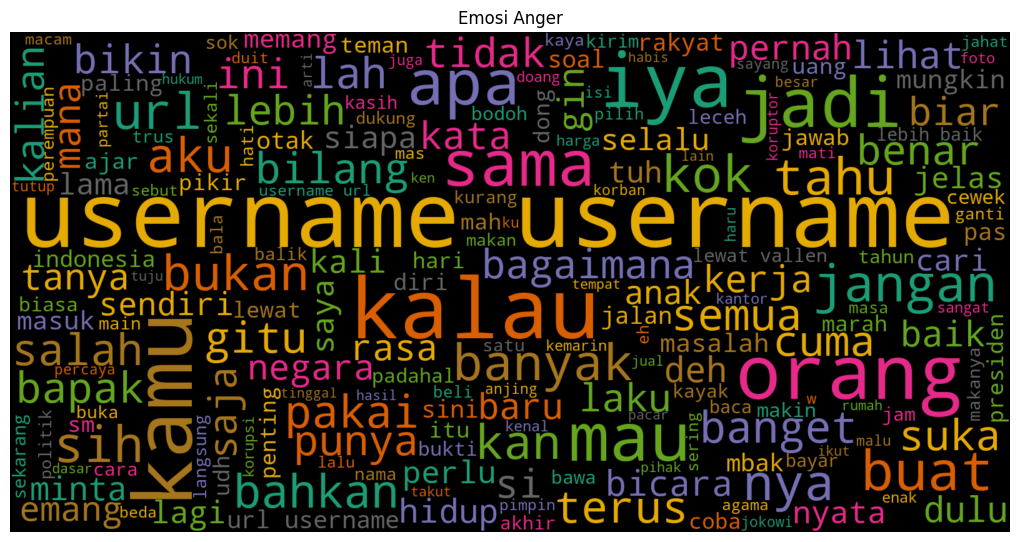

In [39]:
#worldcloud anger
data_anger = dataset.loc[(dataset['label'] == 'anger')]
word_anger = pd.Series(' '.join(data_anger['cleaning']).split())
text_anger = ' '.join(word_anger)

# Display the generated image:
wordcloud_anger = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_anger)
plt.figure(figsize=(10,10))
plt.title('Emosi Anger')
plt.imshow(wordcloud_anger, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

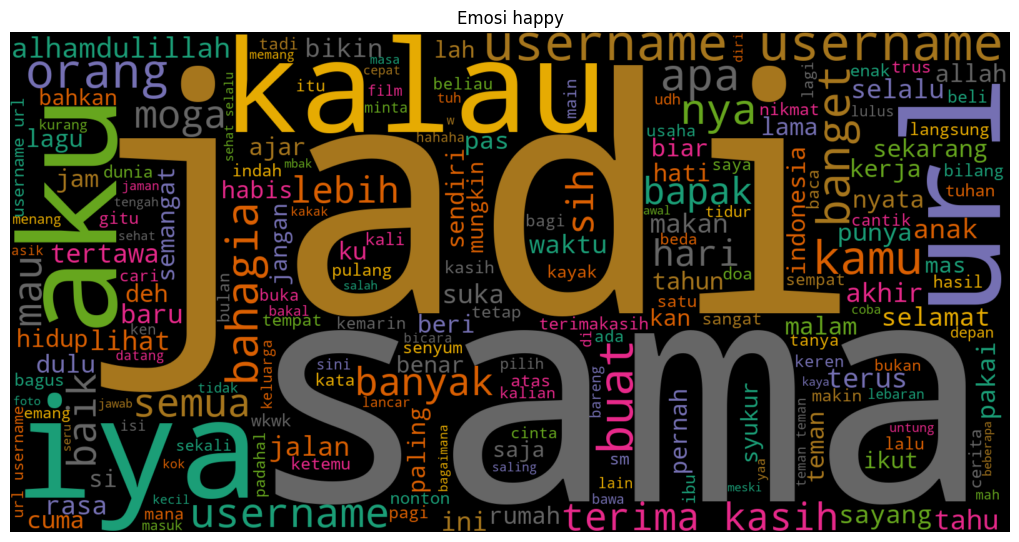

In [40]:
#worldcloud happy
data_happy = dataset.loc[(dataset['label'] == 'happy')]
word_happy = pd.Series(' '.join(data_happy['cleaning']).split())
text_happy = ' '.join(word_happy)

# Display the generated image:
wordcloud_happy = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_happy)
plt.figure(figsize=(10,10))
plt.title('Emosi happy')
plt.imshow(wordcloud_happy, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

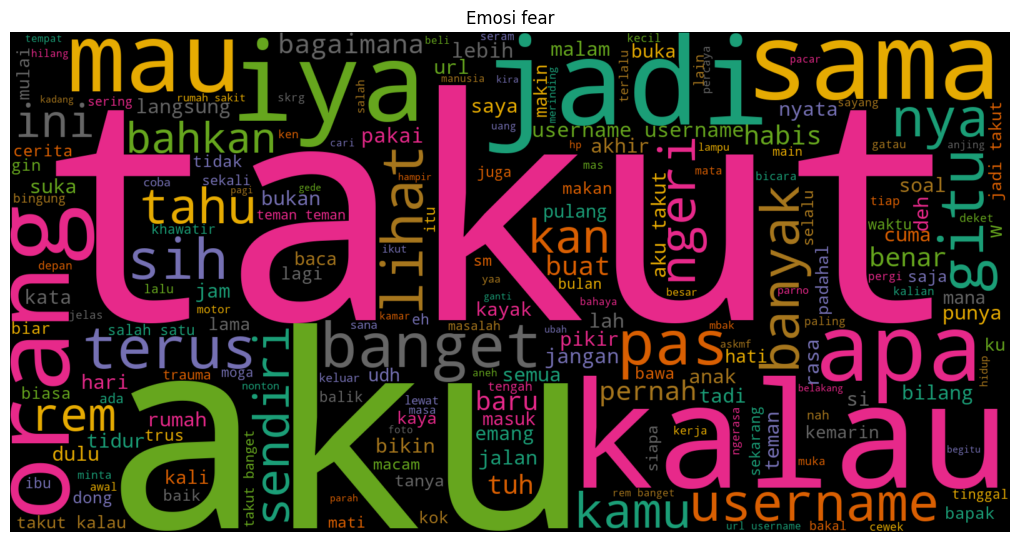

In [41]:
#worldcloud fear
data_fear = dataset.loc[(dataset['label'] == 'fear')]
word_fear = pd.Series(' '.join(data_fear['cleaning']).split())
text_fear = ' '.join(word_fear)

# Display the generated image:
wordcloud_fear = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(text_fear)
plt.figure(figsize=(10,10))
plt.title('Emosi fear')
plt.imshow(wordcloud_fear, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

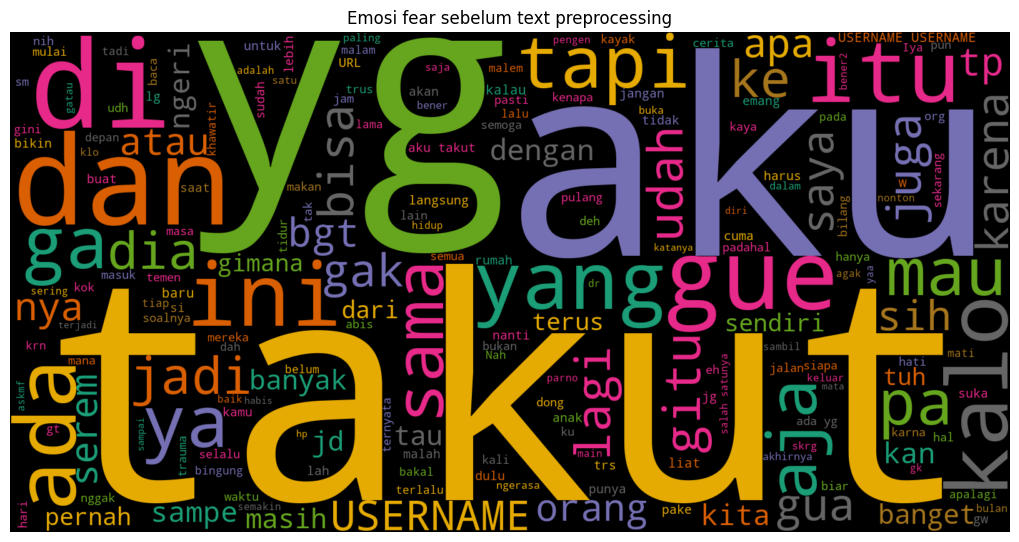

In [42]:
#worldcloud fear sebelum preprocessing
pra_data_fear = dataset.loc[(dataset['label'] == 'fear')]
pra_word_fear = pd.Series(' '.join(pra_data_fear['tweet']).split())
pra_text_fear = ' '.join(pra_word_fear)

# Display the generated image:
wordcloud_pra_fear = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(pra_text_fear)
plt.figure(figsize=(10,10))
plt.title('Emosi fear sebelum text preprocessing')
plt.imshow(wordcloud_pra_fear, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

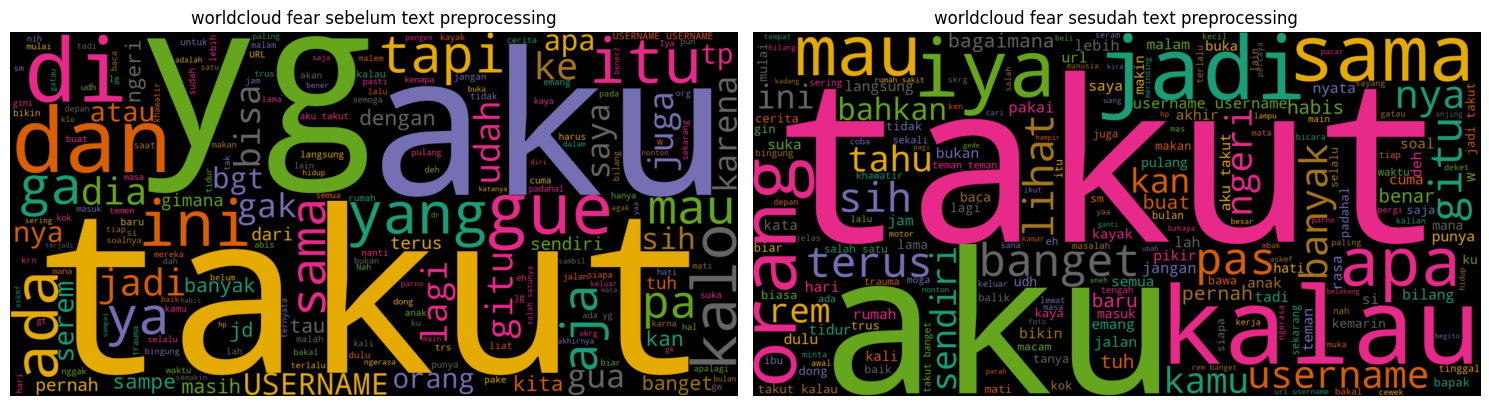

In [43]:
# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Subplot 1 - worldcloud fear sebelum text preprocessing
axs[0].imshow(wordcloud_pra_fear, interpolation='bilinear')
axs[0].set_title('worldcloud fear sebelum text preprocessing')
axs[0].axis("off")

# Subplot 2 - worldcloud fear sesudah text preprocessing
axs[1].imshow(wordcloud_fear, interpolation='bilinear')
axs[1].set_title('worldcloud fear sesudah text preprocessing')
axs[1].axis("off")

# Adjust layout
plt.tight_layout()

# Menampilkan plot
plt.show()

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = dataset["cleaning"].values
y = dataset["label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)


vectorizer = TfidfVectorizer()


X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [31]:
import pickle
dataset.to_csv('../dataset/processed.csv')

with open("../dataset/vectorizer.pickle", "wb") as f:
    pickle.dump(vectorizer, f)
    
train_data = {"x":X_train, "y":y_train}
test_data = {"x":X_test, "y":y_test}

with open("../dataset/train_data.pickle", "wb") as f:
    pickle.dump(train_data, f)
    
with open("../dataset/test_data.pickle", "wb") as f:
    pickle.dump(test_data, f)